In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
from matplotlib import gridspec

Check the data

In [16]:
df = pd.read_csv('card.csv', header = [0,1])
np.random.seed(1234)
length = len(df)
df.sample(n = int(length/4))
df.head(5)
df.dtypes
n = len(df[df[('Y', 'default payment next month')]  == 1])
df.shape

(30000, 25)

Let's look into more details for the data

In [17]:
df.describe()

,Unnamed: 0_level_0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
print("Fraudulent Cases: " + str(len(df[df[('Y', 'default payment next month')]  == 1])))
print("Valid Transactions: " + str(len(df[df[('Y', 'default payment next month')]  == 0])))
print("Proportion of Fraudulent Cases: " + str(len(df[df[('Y', 'default payment next month')]  == 1])/ df.shape[0]))

Fraudulent Cases: 6636
Valid Transactions: 23364
Proportion of Fraudulent Cases: 0.2212


<AxesSubplot: ylabel=' '>

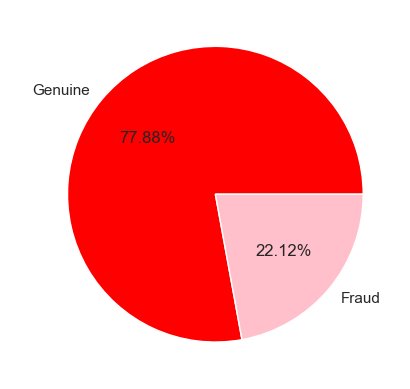

In [5]:
df_p = df.copy()
df_p[" "] = np.where(df_p[('Y', 'default payment next month')] == 1 ,  "Fraud", "Genuine")
df_p[" "].value_counts().plot.pie(autopct = '%.2f%%', colors = ['red','pink'])

In [6]:
#Check missing values
df.isnull().shape[0]
print("Non-missing values: " + str(df.isnull().shape[0]))
print("Missing values: " + str(df.shape[0] - df.isnull().shape[0]))

Non-missing values: 30000
Missing values: 0


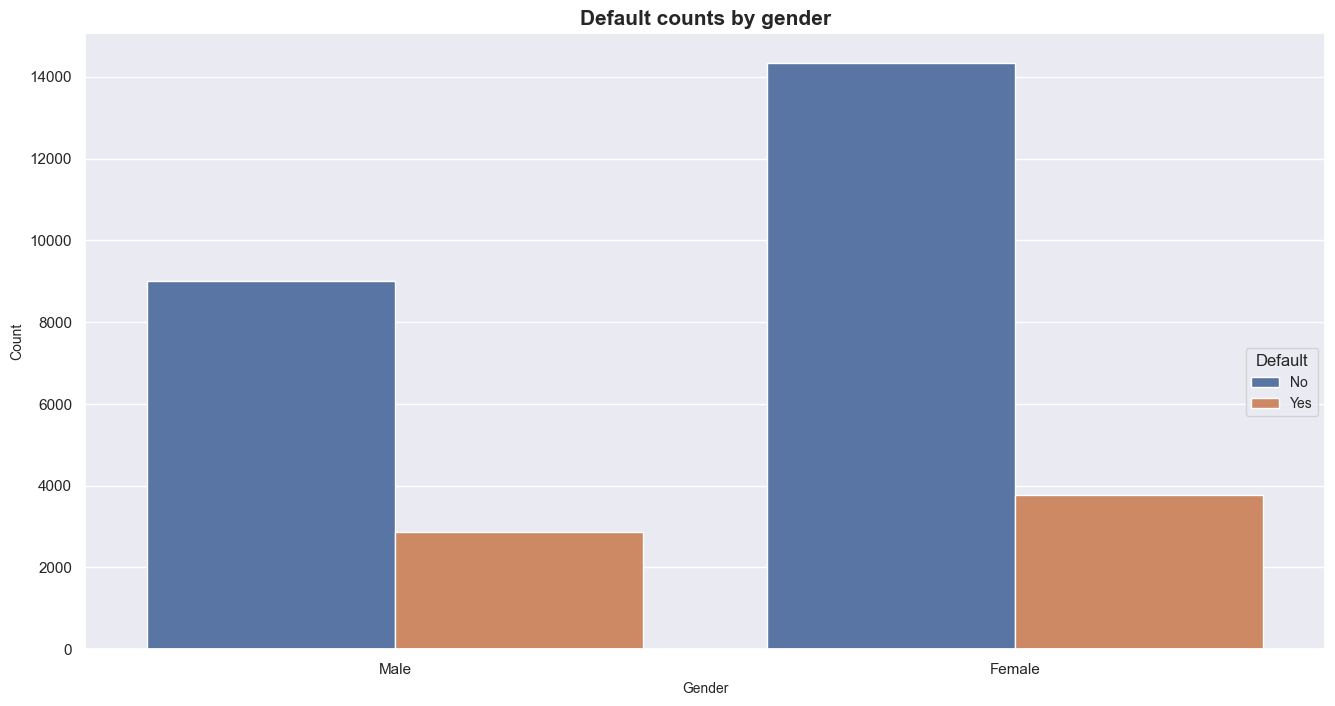

In [31]:
plt.figure(figsize = (16,8))
sns.countplot(data = df, hue = ('Y', 'default payment next month'), x = ('X2', 'SEX'))
plt.title('Default counts by gender', fontsize=15, weight = 'bold')
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(ticks = [0,1], labels = ['Male', 'Female'])
plt.legend(bbox_to_anchor=(1,0.5), title='Default', fontsize=10, labels=['No','Yes'])
plt.show()

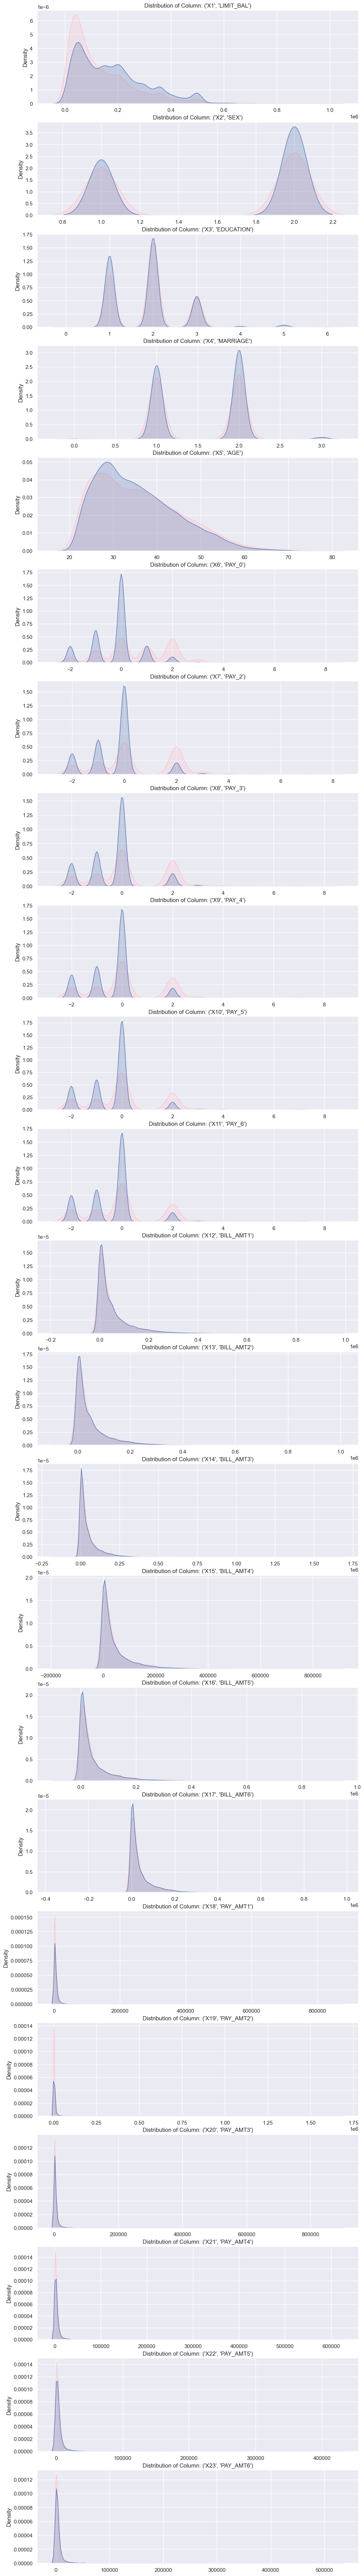

In [15]:
# Plot the distributions of the features
columns = df.iloc[:,1:24].columns
plt.figure(figsize=(12,24*4))
grids = gridspec.GridSpec(23, 1)
for grid, index in enumerate(df[columns]):
 ax = plt.subplot(grids[grid])
 sns.kdeplot(df[index][df[("Y","default payment next month")] == 1], fill = True , color = "pink")
 sns.kdeplot(df[index][df[("Y","default payment next month")] == 0], fill = True)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()


NameError: name 'fig' is not defined

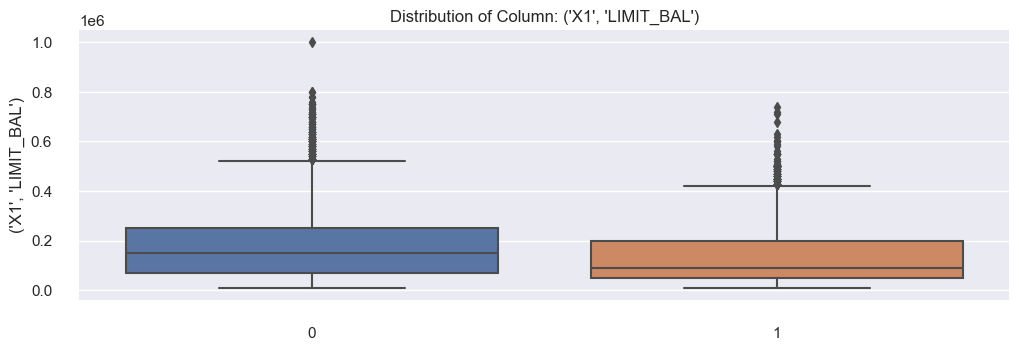

In [8]:
#Boxplots to observe outliers
columns = df.iloc[:,1:24].columns
plt.figure(figsize=(12,24*4))
grids = gridspec.GridSpec(23, 1)
for grid, index in enumerate(df[columns]):
 ax = plt.subplot(grids[grid])
 sns.boxplot(x = ('Y','default payment next month'), y = index, data = df) 
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
 sns.despine(offset=10, trim=True) 
 fig.set_size_inches(22,18)
plt.show()

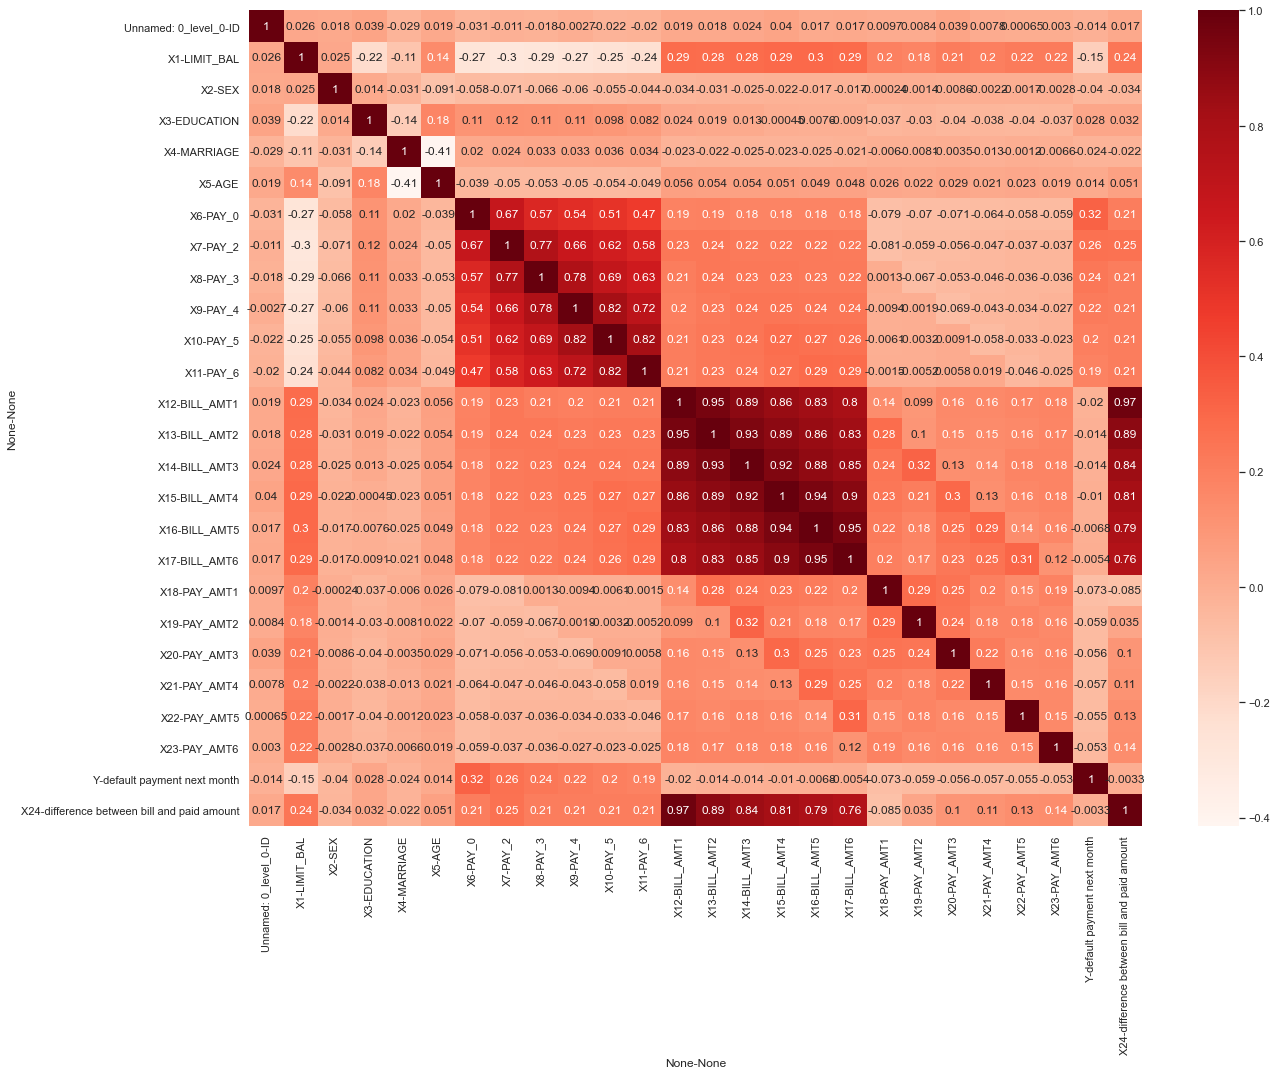

In [ ]:
#Using Pearson Correlation
df[('X24', 'difference between bill and paid amount')] = df[('X12', 'BILL_AMT1')] - df[('X18', 'PAY_AMT1')]
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Using the filter method, there are no clear features to select for the model
#df.plot.bar(x = ('X2', 'SEX'), y = ('Y','default payment next month'))

In [ ]:
import statsmodels.api as sm
y = df[('Y', 'default payment next month')]
cols = list(df.iloc[:,1:24].columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05): #if p-value < 0.05, then variable is removed
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

[('X1', 'LIMIT_BAL'), ('X2', 'SEX'), ('X3', 'EDUCATION'), ('X4', 'MARRIAGE'), ('X5', 'AGE'), ('X6', 'PAY_0'), ('X7', 'PAY_2'), ('X8', 'PAY_3'), ('X10', 'PAY_5'), ('X12', 'BILL_AMT1'), ('X13', 'BILL_AMT2'), ('X18', 'PAY_AMT1'), ('X19', 'PAY_AMT2')]


In [ ]:
 #The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. 
 # It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. 
 # It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
#Initializing RFE model
rfe = RFE(estimator = LinearRegression(), n_features_to_select=14)
#Transforming data using RFE
X_rfe = rfe.fit_transform(df.iloc[:,1:24],y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)


[False  True  True  True  True  True  True  True  True  True  True  True
 False False False False False  True False False  True  True False]
[ 5  1  1  1  1  1  1  1  1  1  1  1  3  8  7 10  6  1  2  9  1  1  4]


In [ ]:
#no of features
nof_list=np.arange(1,24)    
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(estimator = model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 21
Score with 21 features: 0.115332


In [ ]:
#split data into train and test set (1/3 test, 2/3 train)
y = df[("Y", "default payment next month")] # target 
X = df.iloc[:,0:24]

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 24), (9000, 24), (21000,), (9000,))

In [ ]:
#Create cross validation framework
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=10, random_state = None, shuffle = False)

In [ ]:
#Import imbalance learn module
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods. 
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE. 
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Random Forest
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)

# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  
print("The accuracy is", accuracy_score(y_test, y_pred)) 
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.8164164164164164
The precision is 0.636650868878357
The recall is 0.3697247706422018
The F1 score is 0.4677887405687754


In [ ]:
# Fit and predict
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)

# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  
print("The accuracy is", accuracy_score(y_test, y_pred)) 
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.815915915915916
The precision is 0.6367281475541299
The recall is 0.3642201834862385
The F1 score is 0.4633790487306682
